## Define and draw the hydrophobic Lennard-Jones potential
see: Ashbaugh HS, Hatch HW. Natively unfolded protein stability as a coil-to-globule transition in charge/hydropathy space. J Am Chem Soc. 2008; 130: 9536–9542. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def hydrophobic_potential(xs: np.array, epsilon, sigma, lambdas):
    index_minus = np.argwhere(xs < 2**(1/6)*sigma)
    index_plus = np.argwhere(xs >= 2**(1/6)*sigma)

    x_minus = xs[index_minus]
    x_plus = xs[index_plus]

    U_lj = 4*epsilon*((sigma/xs)**12-(sigma/xs)**6)
    U_minus =  U_lj[index_minus] + (1-lambdas)*epsilon
    U_plus = U_lj[index_plus]*lambdas

    U_hps = np.zeros(len(xs))
    U_hps[index_minus] = U_minus
    U_hps[index_plus] = U_plus

    return U_hps

In [3]:
delta = 0.01
xs = np.arange(0.6,1.6,delta)

lambdas_list = [0, 1, 2, 3, 4]

U_hps = {}

for lambdas in lambdas_list:
    U_hps[lambdas] = hydrophobic_potential(xs, 1, 1, lambdas)

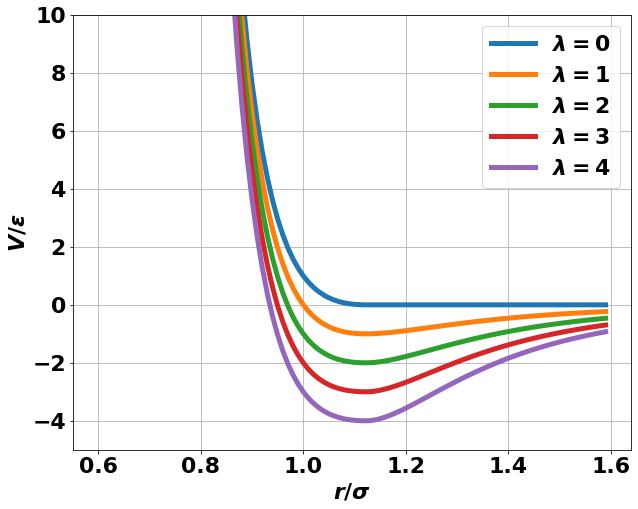

In [17]:
plt.figure(figsize=(10,8))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
matplotlib.rc('lines', lw=5)

for lambdas in lambdas_list:
    plt.plot(xs, U_hps[lambdas], '-',label='$\lambda = $'+str(lambdas))
plt.grid()

plt.ylim([-5,10])
plt.legend()
plt.xlabel('$r/\sigma$')
plt.ylabel('$V/\epsilon$')
plt.savefig('images/hydrophobic_potential.png')
plt.show()

just a plot of lists or arrays

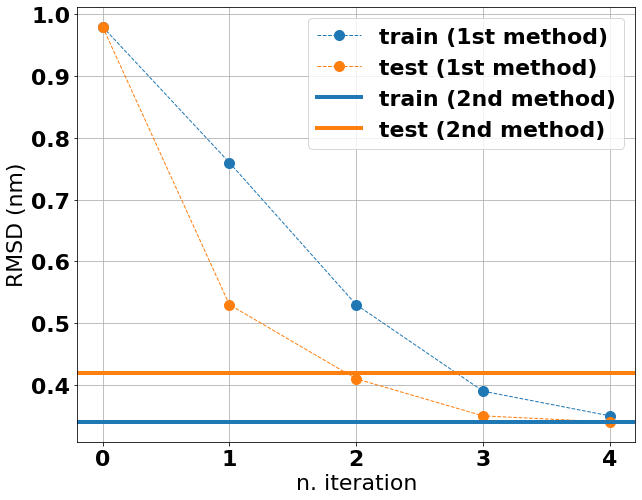

In [45]:
x = [0, 1, 2, 3, 4]
y_train = [0.98, 0.76, 0.53, 0.39, 0.35]
y_test = [0.98, 0.53, 0.41, 0.35, 0.34]

x2 = [-1,5]
y2_train = 0.34*np.ones(2)
y2_test = 0.42*np.ones(2)

plt.figure(figsize=(10,8))

matplotlib.rc('lines', lw=1)
matplotlib.rcParams['lines.markersize'] = 20

plt.plot(x, y_train, '.--', label='train (1st method)', color='tab:blue')
plt.plot(x, y_test, '.--', label='test (1st method)', color='tab:orange')
plt.plot(x2, y2_train, '-', label='train (2nd method)', color='tab:blue', linewidth=4)
plt.plot(x2, y2_test, '-', label='test (2nd method)', color='tab:orange', linewidth=4)
plt.legend()
plt.xlabel('n. iteration')
plt.ylabel('RMSD (nm)')
#plt.xlim(left=0)
plt.xlim([-0.2,4.2])
plt.grid()
plt.savefig('images/RMSE_1.png')
